In [103]:
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

### Visualization and Preprocessing 

In [56]:
data = pd.read_csv("heart_disease_dataset.csv")

In [57]:
print(len(data))
print(data.shape)

1000
(1000, 16)


In [58]:
data.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [60]:
data.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [61]:
data.describe(include=object)

,Gender,Smoking,Alcohol Intake,Family History,Diabetes,Obesity,Exercise Induced Angina,Chest Pain Type
count,1000,1000,660,1000,1000,1000,1000,1000
unique,2,3,2,2,2,2,2,4
top,Female,Never,Heavy,No,Yes,No,No,Non-anginal Pain
freq,503,338,346,501,505,501,528,256


In [62]:
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [63]:
data.isnull().sum() 

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [64]:
#From understanding the samples the null values means not taking alcohol
#replacing null values with word "None"
data["Alcohol Intake"]= data["Alcohol Intake"].fillna("None")
data["Alcohol Intake"].value_counts()


Alcohol Intake
Heavy       346
None        340
Moderate    314
Name: count, dtype: int64

In [65]:
#numerical values for correlation 
numerical = data.select_dtypes(include=int).columns
print(numerical)

Index(['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours',
       'Stress Level', 'Blood Sugar', 'Heart Disease'],
      dtype='object')


In [66]:
corr_matrix = data[numerical].corr()
corr_matrix["Heart Disease"].sort_values(ascending=False)

Heart Disease     1.000000
Age               0.646871
Cholesterol       0.365041
Heart Rate        0.013209
Stress Level      0.007071
Blood Pressure    0.006900
Blood Sugar      -0.013004
Exercise Hours   -0.014226
Name: Heart Disease, dtype: float64

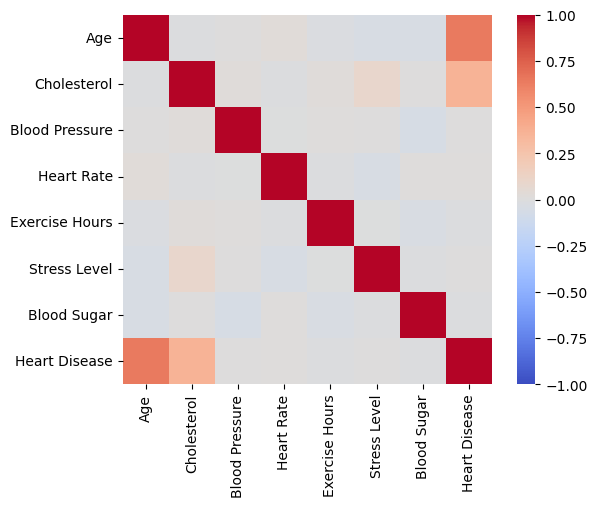

In [67]:
axis_corr = sns.heatmap(
corr_matrix,
vmin=-1,vmax=1,center=0,
cmap="coolwarm",
square=True)

plt.show()

#Age then Cholesterol level have high positvie linear relationship with Heart Disease 

<Axes: xlabel='Age', ylabel='Count'>

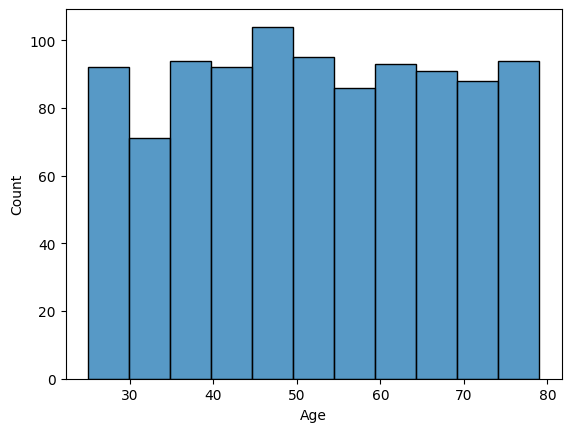

In [68]:
sns.histplot(data=data, x="Age")
#shows that the samples contains people from all ages 

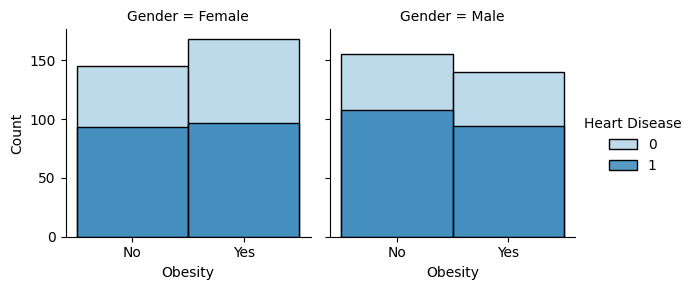

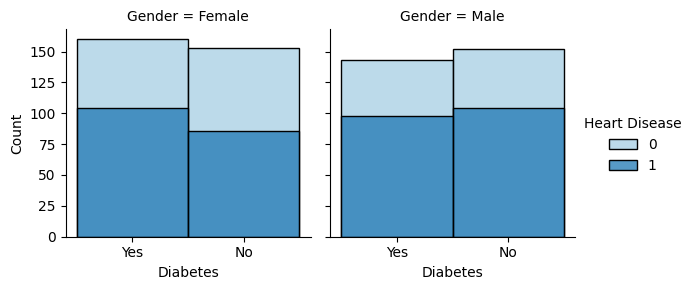

In [69]:
g = sns.FacetGrid(data, col="Gender",hue="Heart Disease",palette='Paired')
g.map(sns.histplot,"Obesity")
g.add_legend()

m = sns.FacetGrid(data, col="Gender",hue="Heart Disease",palette='Paired')
m.map(sns.histplot,"Diabetes")
m.add_legend()

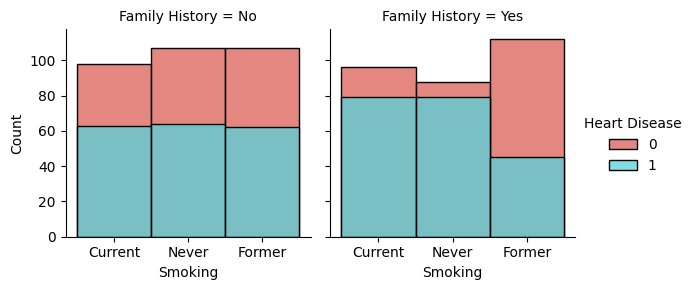

In [70]:
z = sns.FacetGrid(data, col="Family History",hue="Heart Disease",palette='hls')
z.map(sns.histplot,"Smoking")
z.add_legend()


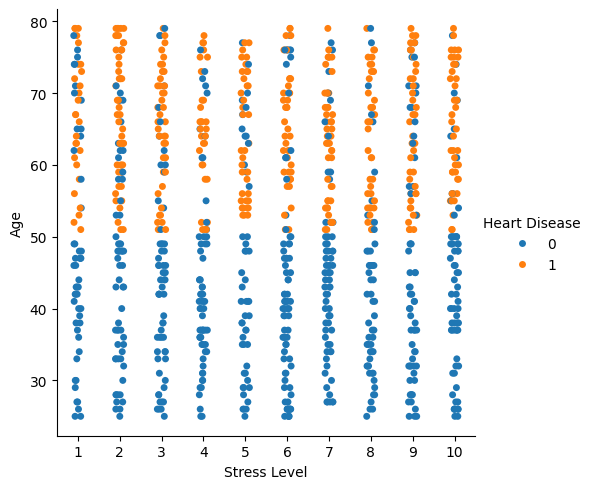

In [71]:
sns.catplot(data, x="Stress Level", y="Age",hue= "Heart Disease")
#It shows that Age is big Facator in getting Heart Disease while Stress level is not a major one 

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

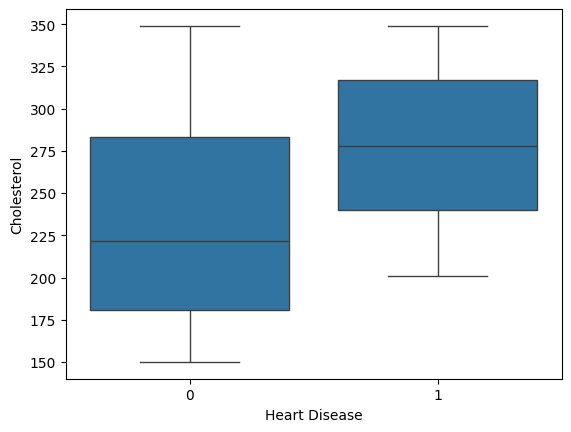

In [72]:
sns.boxplot( y="Cholesterol",x="Heart Disease", data=data)
#Medain of Cholesterol Levels is higher for people having heart Disease 

In [73]:
#seperating the label from the features to process data
data_features =data.drop("Heart Disease",axis=1)
data_label = data["Heart Disease"].copy()
data_features.shape

(1000, 15)

In [74]:
numerical_cols = data_features.select_dtypes(include=int).columns
print(numerical_cols)
categorical_cols= data_features.select_dtypes(include=object).columns
print(categorical_cols)

Index(['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours',
       'Stress Level', 'Blood Sugar'],
      dtype='object')
Index(['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes',
       'Obesity', 'Exercise Induced Angina', 'Chest Pain Type'],
      dtype='object')


In [75]:
# seperating the column that have t20 values to use rdinal encoder on them and with 3 values and more one hot encoder 
three_or_more_types_cat = [col for col in categorical_cols if data[col].nunique() >= 3]
two_types_cat = [col for col in categorical_cols if data[col].nunique() <= 2]
print(three_or_more_types_cat)
print(two_types_cat)

['Smoking', 'Alcohol Intake', 'Chest Pain Type']
['Gender', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']


In [76]:

full_pipeline = ColumnTransformer([
    ("standard", StandardScaler(),numerical_cols),
    ("one_hot",OneHotEncoder(),three_or_more_types_cat),
    ("ordinal", OrdinalEncoder(), two_types_cat)
])

data_prepared= full_pipeline.fit_transform(data)
data_prepared=pd.DataFrame(data_prepared,columns= full_pipeline.get_feature_names_out())
full_pipeline.get_feature_names_out()

array(['standard__Age', 'standard__Cholesterol',
       'standard__Blood Pressure', 'standard__Heart Rate',
       'standard__Exercise Hours', 'standard__Stress Level',
       'standard__Blood Sugar', 'one_hot__Smoking_Current',
       'one_hot__Smoking_Former', 'one_hot__Smoking_Never',
       'one_hot__Alcohol Intake_Heavy',
       'one_hot__Alcohol Intake_Moderate', 'one_hot__Alcohol Intake_None',
       'one_hot__Chest Pain Type_Asymptomatic',
       'one_hot__Chest Pain Type_Atypical Angina',
       'one_hot__Chest Pain Type_Non-anginal Pain',
       'one_hot__Chest Pain Type_Typical Angina', 'ordinal__Gender',
       'ordinal__Family History', 'ordinal__Diabetes', 'ordinal__Obesity',
       'ordinal__Exercise Induced Angina'], dtype=object)

In [77]:
data_prepared.describe()

,standard__Age,standard__Cholesterol,standard__Blood Pressure,standard__Heart Rate,standard__Exercise Hours,standard__Stress Level,standard__Blood Sugar,one_hot__Smoking_Current,one_hot__Smoking_Former,one_hot__Smoking_Never,...,one_hot__Alcohol Intake_None,one_hot__Chest Pain Type_Asymptomatic,one_hot__Chest Pain Type_Atypical Angina,one_hot__Chest Pain Type_Non-anginal Pain,one_hot__Chest Pain Type_Typical Angina,ordinal__Gender,ordinal__Family History,ordinal__Diabetes,ordinal__Obesity,ordinal__Exercise Induced Angina
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.463896e-17,1.163514e-16,-2.113865e-16,5.719869e-16,3.819167e-17,1.421085e-17,-7.105427e-17,0.336000,0.326000,0.338000,...,0.340000,0.248000,0.246000,0.25600,0.250000,0.497000,0.499000,0.505000,0.499000,0.472000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.472575,0.468982,0.473265,...,0.473946,0.432068,0.430894,0.43664,0.433229,0.500241,0.500249,0.500225,0.500249,0.499465
min,-1.736278e+00,-1.726488e+00,-1.716808e+00,-1.672772e+00,-1.544272e+00,-1.641923e+00,-1.770413e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.456505e-01,-8.627173e-01,-8.542526e-01,-8.017179e-01,-8.623237e-01,-9.351117e-01,-8.435095e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.863955e-02,-3.349704e-02,2.726056e-02,-1.776950e-02,-9.888252e-03,1.251056e-01,1.608450e-03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.719876e-01,8.475494e-01,8.992951e-01,8.532843e-01,8.425472e-01,8.319172e-01,8.739883e-01,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.00000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.698998e+00,1.711320e+00,1.657586e+00,1.724338e+00,1.524496e+00,1.538729e+00,1.746368e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
data_prepared.head()

,standard__Age,standard__Cholesterol,standard__Blood Pressure,standard__Heart Rate,standard__Exercise Hours,standard__Stress Level,standard__Blood Sugar,one_hot__Smoking_Current,one_hot__Smoking_Former,one_hot__Smoking_Never,...,one_hot__Alcohol Intake_None,one_hot__Chest Pain Type_Asymptomatic,one_hot__Chest Pain Type_Atypical Angina,one_hot__Chest Pain Type_Non-anginal Pain,one_hot__Chest Pain Type_Typical Angina,ordinal__Gender,ordinal__Family History,ordinal__Diabetes,ordinal__Obesity,ordinal__Exercise Induced Angina
0,1.444534,-0.379005,-0.617287,-1.150139,-1.203298,0.831917,-0.434581,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.273104,-0.793616,1.126782,-1.498561,0.160599,1.185323,-1.770413,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.044977,-0.275353,-1.678894,-1.063034,-0.521350,-0.228300,1.664583,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.062836,-1.000921,-1.716808,-0.627507,-0.180375,0.478511,-0.761724,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.617523,-1.346429,1.050953,1.201706,0.501573,-1.288517,1.310178,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [98]:
#put the label again with the data
data_prepared["Heart Disease"] = data_label
print(data_prepared.columns)


Index(['standard__Age', 'standard__Cholesterol', 'standard__Blood Pressure',
       'standard__Heart Rate', 'standard__Exercise Hours',
       'standard__Stress Level', 'standard__Blood Sugar',
       'one_hot__Smoking_Current', 'one_hot__Smoking_Former',
       'one_hot__Smoking_Never', 'one_hot__Alcohol Intake_Heavy',
       'one_hot__Alcohol Intake_Moderate', 'one_hot__Alcohol Intake_None',
       'one_hot__Chest Pain Type_Asymptomatic',
       'one_hot__Chest Pain Type_Atypical Angina',
       'one_hot__Chest Pain Type_Non-anginal Pain',
       'one_hot__Chest Pain Type_Typical Angina', 'ordinal__Gender',
       'ordinal__Family History', 'ordinal__Diabetes', 'ordinal__Obesity',
       'ordinal__Exercise Induced Angina', 'Heart Disease'],
      dtype='object')


In [243]:
#Splitting the data 
kfold = StratifiedKFold(n_splits=10, shuffle=True)

for train_index, test_index in kfold.split(data_prepared, data_prepared["Heart Disease"]):
  train_set = data_prepared.iloc[train_index]
  test_set =data_prepared.iloc[test_index]


In [244]:
x_test = test_set.drop('Heart Disease',axis=1)
y_test = test_set['Heart Disease'].copy()
x_train = train_set.drop('Heart Disease',axis=1)
y_train = train_set['Heart Disease'].copy()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 22)
(900,)
(100, 22)
(100,)


### Finding best model 

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score ,f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression 

In [293]:
log_reg = LogisticRegression()
log_param = [{'C' : [1,10,50] , 'max_iter' : [50,100,500],
              'penalty' : ['l1','l2'], 
              'solver':['liblinear']},
              ]
grid_search = GridSearchCV(log_reg,log_param,cv=8,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 50], 'max_iter': [50, 100, 500],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='accuracy')

In [294]:
log_reg=grid_search.best_estimator_

In [295]:
print("Best params for Logistic regression",grid_search.best_params_)
print ('Accuarcy for Logistic Regression = ', grid_search.best_score_)

Best params for Logistic regression {'C': 1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Accuarcy for Logistic Regression =  0.8578638590391909


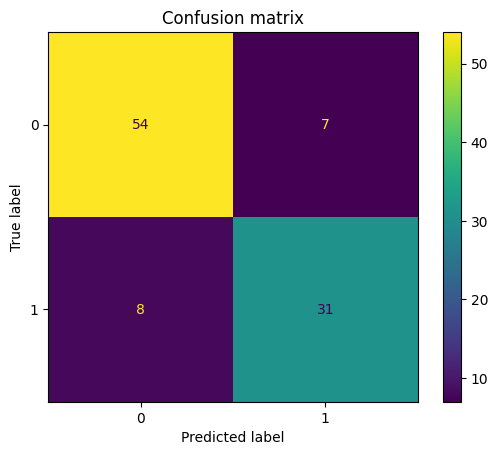

In [296]:
y_pred = grid_search.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion matrix")
plt.show()

In [298]:
log_results= classification_report(y_test,y_pred)
print(log_results)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        61
           1       0.82      0.79      0.81        39

    accuracy                           0.85       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100



#### Random Forest Classifier 

In [323]:
Random_forest = RandomForestClassifier()
random_forest_param = [{'n_estimators':[50,100],'criterion':['gini', 'entropy'],
              'max_depth':[1,2,3]
             }]
grid_search = GridSearchCV(Random_forest,random_forest_param,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3], 'n_estimators': [50, 100]}],
             scoring='accuracy')

In [324]:
Random_forest=grid_search.best_estimator_

In [325]:
print("Best params for Random Forest",grid_search.best_params_)
print ('Accuarcy for Random Forest = ', grid_search.best_score_)

Best params for Random Forest {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}
Accuarcy for Random Forest =  0.9988888888888889


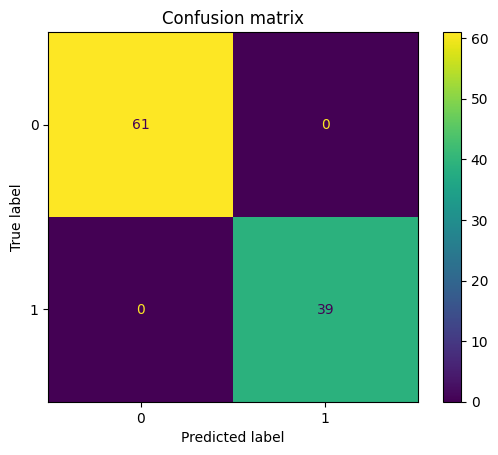

In [302]:
y_pred = grid_search.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion matrix")
plt.show()

In [304]:
#no need for testing other classifiers
Random_forest_results= classification_report(y_test,y_pred)
print(Random_forest_results)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        39

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [329]:
Random_forest.feature_names_in_

array(['standard__Age', 'standard__Cholesterol',
       'standard__Blood Pressure', 'standard__Heart Rate',
       'standard__Exercise Hours', 'standard__Stress Level',
       'standard__Blood Sugar', 'one_hot__Smoking_Current',
       'one_hot__Smoking_Former', 'one_hot__Smoking_Never',
       'one_hot__Alcohol Intake_Heavy',
       'one_hot__Alcohol Intake_Moderate', 'one_hot__Alcohol Intake_None',
       'one_hot__Chest Pain Type_Asymptomatic',
       'one_hot__Chest Pain Type_Atypical Angina',
       'one_hot__Chest Pain Type_Non-anginal Pain',
       'one_hot__Chest Pain Type_Typical Angina', 'ordinal__Gender',
       'ordinal__Family History', 'ordinal__Diabetes', 'ordinal__Obesity',
       'ordinal__Exercise Induced Angina'], dtype=object)

In [330]:
Random_forest.feature_importances_

array([0.47603627, 0.33762576, 0.03771958, 0.02228314, 0.00944931,
       0.01520855, 0.03834405, 0.00185824, 0.01896129, 0.00240828,
       0.00195025, 0.00613508, 0.0036911 , 0.00239271, 0.00487348,
       0.0077488 , 0.00259127, 0.00164557, 0.0018788 , 0.00440414,
       0.00188951, 0.00090481])

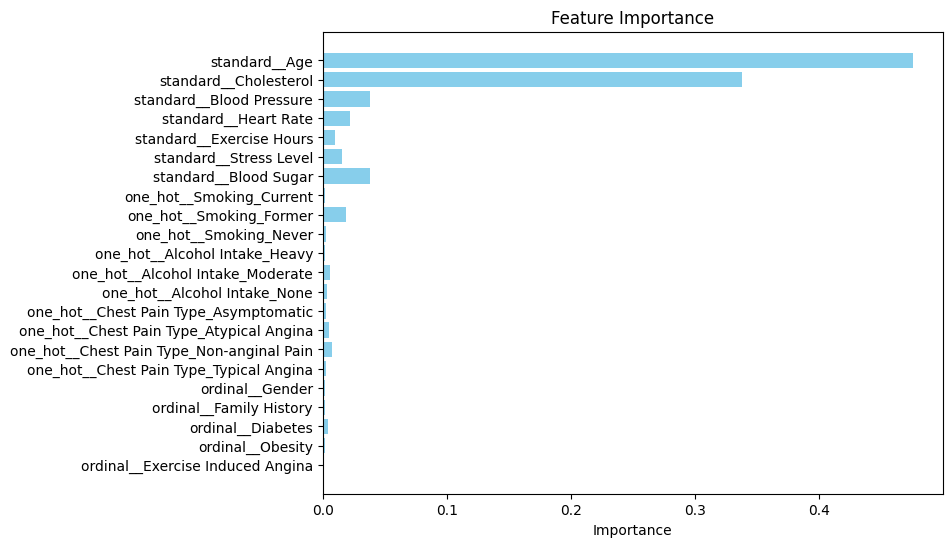

In [347]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 6))
plt.barh(Random_forest.feature_names_in_,Random_forest.feature_importances_, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

### Model saved

In [313]:
import joblib

filename = 'Heart_model.pkl'
joblib.dump(Random_forest, filename)


['Heart_model.pkl']

In [321]:
model_from_joblib = joblib.load('Heart_model.pkl')
model_from_joblib.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)